In [8]:
#Importing MNIST dataset
from keras.datasets import mnist
# The np_utils module provides utilities for converting data types and manipulating arrays.
from keras.utils import np_utils

In [9]:
"""
matplotlib : collection of functions that creates various types of plots and visualizations.
matplotlib inline :  to set the backend of matplotlib to inline, ensuring that plots are displayed within the notebook cells.
"""
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
"""
X_train : input data, which are images of handwritten digits
y_train : the corresponding labels, which are the actual digits represented in the images.
X_test  : the input data for testing
y_test  : the corresponding labels for the testing data.

"""

#load_data : unpacks the data into tuples : (X_train, y_train) and (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
print(X_train[1].shape)

(28, 28)


In [12]:
"""
.shape : helps to view the dimensions of the numpy array
"""

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[0], X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[0], X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (60000, 28)
Number of training examples : 10000 and each image is of shape (10000, 28)


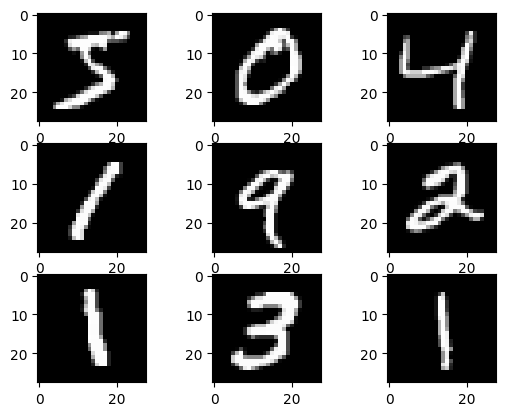

In [14]:
"""
plt.subplot() : divides the figure into a grid of subplots.
330 : shorthand notation for a 3x3 grid of subplots
1 + i : the position of the current subplot within the grid.
"""

for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [15]:
"""
Reshaping the input data from a 2D format to a 1D format

X_train.shape[0] : the number of samples in the training dataset.
X_train.shape[1] : the height of each image.
X_train.shape[2] : the width of each image.

rows = number of samples
columns = height * width (28 * 28 = 784)

"""
#convert 2d to 1d
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [16]:
"""
.shape : helps to view the dimensions of the input array
"""

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [20]:
"""
Pixel scaling : the original range of 0 to 255 to a new range of 0 to 1.
This normalization is done by dividing each pixel value by the maximum value (255 in this case).

pixel values are typically represented as integers between 0 and 255,
where 0 represents black and 255 represents white.

"""

X_train = X_train/255
X_test = X_test/255

In [22]:
print(X_train[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [23]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [24]:
"""
One-hot encoding is a technique used to represent categorical data, such as class labels, as binary vectors.
to_categorical() from the np_utils module :
      Arguments :
          y_train  : original class labels
          10.      : total number of classes

"""

#One-hot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [25]:
"""
Each element of the vector represents the presence or absence of a specific class
  1 indicating the presence of the class
  0 indicating the absence
"""

print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
"""
keras.model
  -> Sequential : Used to build models layer by layer.
                  provides a linear stack of layers, where each layer has exactly one input tensor and one output tensor.

keras.layers
  -> Dense      : represents a fully connected layer
  -> Activation : Functions that introduces non-linearity to the model

"""

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

In [27]:
# MLP + Sigmoid activation + ADAM Optimizer (MLP + Sigmoid activation + ADAM Optimizer)
model1 = Sequential()
model1.add(Dense(64, input_shape=(784,)))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [35]:
# MLP + ReLU Activation + ADAM Optimizer(MLP + ReLu Activation + ADAM Optimizer)
model2 = Sequential()
model2.add(Dense(64, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [28]:
# MLP + Sigmoid Activation + Batch Normalization
model3 = Sequential()
model3.add(Dense(64, input_shape=(784,)))
model3.add(Activation('sigmoid'))
model3.add(BatchNormalization())
model3.add(Dense(10))
model3.add(Activation('sigmoid'))
model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [38]:
# Print model summary
model1.summary()
model2.summary()
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (

In [37]:
# Train and evaluate model1
model1.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
score1 = model1.evaluate(X_test, Y_test, verbose=0)
print("Model 1 Test Loss:", score1[0])
print("Model 1 Test Accuracy:", score1[1])

# Train and evaluate model2
model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print("Model 2 Test Loss:", score2[0])
print("Model 2 Test Accuracy:", score2[1])

# Train and evaluate model3
model3.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print("Model 3 Test Loss:", score3[0])
print("Model 3 Test Accuracy:", score3[1])

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7098 - accuracy: 0.8326 - val_loss: 0.6653 - val_accuracy: 0.8473
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6518 - accuracy: 0.8440 - val_loss: 0.6134 - val_accuracy: 0.8531
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6043 - accuracy: 0.8525 - val_loss: 0.5714 - val_accuracy: 0.8634
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5650 - accuracy: 0.8597 - val_loss: 0.5350 - val_accuracy: 0.8653
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5326 - accuracy: 0.8653 - val_loss: 0.5056 - val_accuracy: 0.8726
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5054 - accuracy: 0.8707 - val_loss: 0.4814 - val_accuracy: 0.8776
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4826 - accuracy: 0.8752 - val_loss: 0.4598 - val_accuracy: 0.8812
Epoch 

313/313 [==============================] - 0s 1ms/step
[0.07403783 0.00053217 0.01462472 0.37578294 0.00654438 0.3277775
 0.00420697 0.00259205 0.1855361  0.00836527]
3


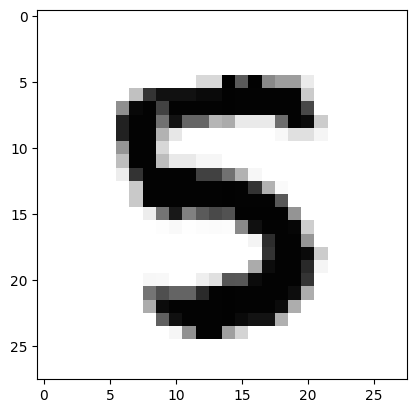

In [32]:
"""
image_index : random image (choose < 10000)

reshape(28, 28) : the flattened image is set back into a 2D format of 28x28 pixels

cmap='Greys' : image will be displayed in black and white.

pred[image_index] : retrieves the predicted probabilities for the image at the specified index

np.argmax() : index of the maximum value in the predicted probabilities array
              indicating the predicted class label.
"""

image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model1.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

313/313 [==============================] - 1s 2ms/step
[0.5119166  0.6772978  0.30434546 0.44971383 0.3401447  0.5776228
 0.6486977  0.6331041  0.58119893 0.6980712 ]
9


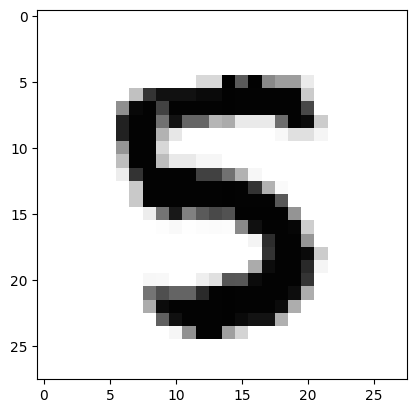

In [34]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model3.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))